In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as const
phi_golden = const.golden_ratio # optional

from classy import Class

In [2]:
font = {'size'   : 14, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
plt.rcParams["figure.figsize"] = [5.0*phi_golden,5.0]

In [3]:
#
fixed_settings = {
                'T_cmb':2.7255,
                'omega_b':0.02238280,
                # 'omega_cdm':0.1201075,
                'h':0.67810,
                'A_s':2.100549e-09, # amplitude of primodial power spectrum
                'n_s':0.9660499, # scalar spectral index
                'output':'tCl,pCl,lCl', # temperature, polarisation and lensing spectrum 
                'lensing':'yes' # say yes if you want CMB lensing, needs 'lCl'
                }

In [4]:
vary_cdm = [0.112, 0.116, 0.120, 0.124, 0.126]

In [15]:
cosmo = {}
raw_cl = []
for i, k in enumerate(vary_cdm):
    cosmo[i] = Class()
    cosmo[i].set(fixed_settings)   # input parameters 
    cosmo[i].set({'omega_cdm': vary_cdm[i]})
    cosmo[i].compute()             # compute cosmology
    T_cmb = cosmo[0].T_cmb()       # get CMB temperature
    raw_cl = np.append(raw_cl, cosmo[i].raw_cl(2500))

    print('Cosmology with omega_cdm = ', k)

    cosmo[i].empty()
    cosmo[i].struct_cleanup()
    
# cosmo = Class()             # call class
# cosmo.set(fixed_settings)   # input parameters 
# cosmo.compute()             # compute cosmology
# T_cmb = cosmo.T_cmb()       # get CMB temperature
# raw_cl = cosmo.raw_cl(2500) # get raw Cl
# cosmo.empty()               # clear input
# cosmo.struct_cleanup()      # free the machine memory

Cosmology with omega_cdm =  0.112
Cosmology with omega_cdm =  0.116
Cosmology with omega_cdm =  0.12
Cosmology with omega_cdm =  0.124
Cosmology with omega_cdm =  0.126


In [18]:
# load dataset
dl = np.loadtxt('dataset/COM_PowerSpect_CMB-TT-binned_R3.01.txt')

In [26]:
## ---- TT spectrum -----
ell = dl.transpose()[0]
Dl = dl.transpose()[1]
errDl_lower = dl.transpose()[2]
errDl_upper = dl.transpose()[3]

<ErrorbarContainer object of 3 artists>

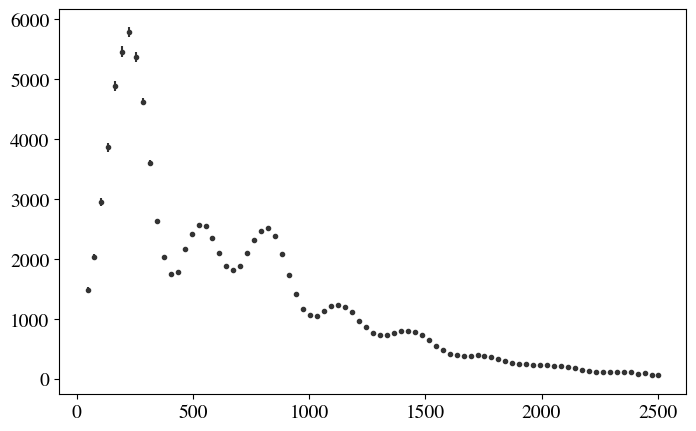

In [27]:
plt.errorbar(ell, Dl, [errDl_lower, errDl_upper], fmt='.',color='0.2')

<ErrorbarContainer object of 3 artists>

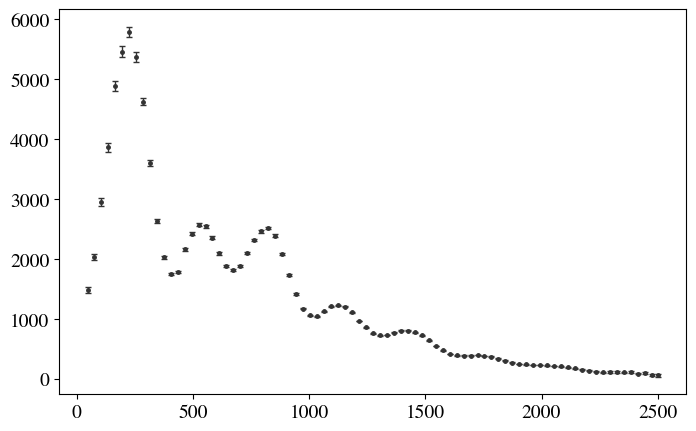

In [28]:
plt.errorbar(ell, Dl, [errDl_lower, errDl_upper], fmt='.',color='0.2',elinewidth=1,ms=5,capthick=1,capsize = 2)

In [14]:
raw_cl[3]

{'tt': array([0.00000000e+00, 0.00000000e+00, 1.44688436e-10, ...,
        9.87669159e-18, 9.82879434e-18, 9.78131819e-18]),
 'ee': array([0.00000000e+00, 0.00000000e+00, 4.37676322e-15, ...,
        3.82860386e-19, 3.84191691e-19, 3.85510758e-19]),
 'te': array([ 0.00000000e+00,  0.00000000e+00,  3.68544405e-13, ...,
        -2.18688515e-19, -2.20599535e-19, -2.22640504e-19]),
 'bb': array([0., 0., 0., ..., 0., 0., 0.]),
 'pp': array([0.00000000e+00, 0.00000000e+00, 8.62511302e-09, ...,
        1.21169247e-22, 1.20842412e-22, 1.20516551e-22]),
 'tp': array([0.00000000e+00, 0.00000000e+00, 4.74982221e-10, ...,
        2.52493862e-23, 2.54055212e-23, 2.55599628e-23]),
 'ell': array([   0,    1,    2, ..., 2498, 2499, 2500])}

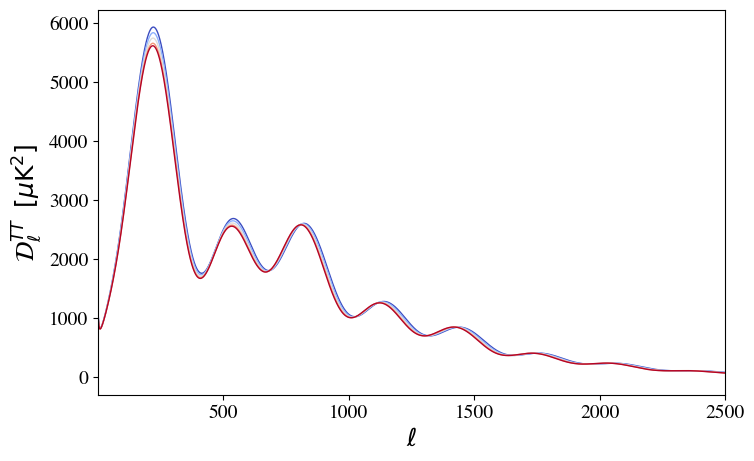

In [20]:
fig, ax = plt.subplots()
for i, k in enumerate(vary_cdm):
    var_color = plt.cm.coolwarm(i/4)
    
    l = raw_cl[i]['ell'][1:]
    Cl_TT = raw_cl[i]['tt'][1:]
    factor = l*(l+1)/(2*np.pi)*T_cmb**2*1e12
    ax.plot(l, factor*Cl_TT, color=var_color,lw=1)
    
plt.xlim(2, 2500)
plt.ylabel(r'$\mathcal{D}_\ell^{TT}\,\,\,[\mu\mathrm{K}^2]$',fontsize=18)
plt.xlabel(r"$\ell$",fontsize=18)

# plt.errorbar(ell, Dl, [errDl_lower, errDl_upper], fmt='.',color='0.2',elinewidth=1,ms=5,capthick=1,capsize = 2)
plt.show()
# plt.savefig('Cl_TT.pdf')

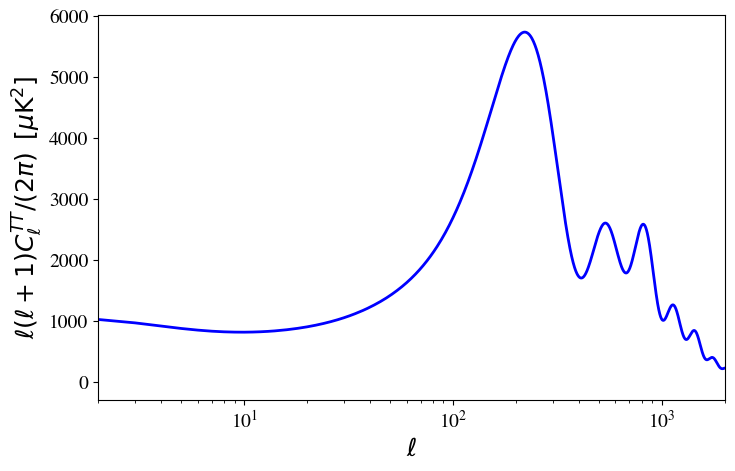

<Figure size 809.017x500 with 0 Axes>

In [25]:
# Plotting CMB TT spectrum

l = raw_cl['ell'][1:]
Cl_TT = raw_cl['tt'][1:]

factor = l*(l+1)/(2*np.pi)*cosmo.T_cmb()**2*1e12

plt.semilogx(l, factor*Cl_TT, color='b',lw=2)
plt.xlim(2,2010)
plt.ylabel(r'$\ell(\ell+1)C_\ell^{TT}/(2\pi)\,\,\,[\mu\mathrm{K}^2]$',fontsize=18)

plt.xlabel(r"$\ell$",fontsize=18)
plt.show()

plt.savefig('Cl_TT.png', )